# A6.6 German Employment Time-seriese Analysis 2010-2025

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the German Employment with 1-lag differencing
#### 5.1 second time 1-lag differencing
#### 6. alternative differencing: seasonal (12 month) differencing
#### 7. decoposition after seasonal differencing

## Importing libraries and data

In [3]:
!pip uninstall -y statsmodels
!pip install statsmodels

Found existing installation: statsmodels 0.14.6
Uninstalling statsmodels-0.14.6:
  Successfully uninstalled statsmodels-0.14.6


You can safely remove it manually.


  Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl (9.5 MB)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
Employment1= pd.read_excel(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\02 Data\Original\German employment 2010-2025.xlsx')

In [7]:
Employment1.head()

,year,month,Economically active population (Mili),Persons in employment (Mili),Unemployed persons (Mili),Unemployment rate (Mili)
0,2010,January,39.93,36.90,3.03,7.6
1,2010,February,39.96,36.91,3.05,7.6
2,2010,March,39.98,37.10,2.88,7.2
3,2010,April,39.93,37.21,2.72,6.8
4,2010,May,39.85,37.24,2.61,6.5


## 2. Subsetting, wrangling, and cleaning time-series data


In [6]:
Employment1['total_population']= Employment1[['Economically active population (Mili)', 'Persons in employment (Mili)', 'Unemployed persons (Mili)']].sum(axis=1)

In [7]:
Employment1['employed_percent']= (Employment1['Persons in employment (Mili)']/Employment1['total_population'])*100

In [8]:
Employment1['unemployed_percent']= (Employment1['Unemployed persons (Mili)']/Employment1['total_population'])*100

In [9]:
Employment1.head()

,year,month,Economically active population (Mili),Persons in employment (Mili),Unemployed persons (Mili),Unemployment rate (Mili),total_population,employed_percent,unemployed_percent
0,2010,January,39.93,36.90,3.03,7.6,79.86,46.205860,3.794140
1,2010,February,39.96,36.91,3.05,7.6,79.92,46.183684,3.816316
2,2010,March,39.98,37.10,2.88,7.2,79.96,46.398199,3.601801
3,2010,April,39.93,37.21,2.72,6.8,79.86,46.594040,3.405960
4,2010,May,39.85,37.24,2.61,6.5,79.70,46.725220,3.274780


In [10]:
Employment2= Employment1[['year ','month','employed_percent', 'unemployed_percent']]

In [11]:
Employment2.head()

,year,month,employed_percent,unemployed_percent
0,2010,January,46.205860,3.794140
1,2010,February,46.183684,3.816316
2,2010,March,46.398199,3.601801
3,2010,April,46.594040,3.405960
4,2010,May,46.725220,3.274780


In [12]:
# the year column has a space. this willl cleane it
Employment2.columns = Employment2.columns.str.strip().str.lower()



In [13]:
# combining the month with the year to have one column of the time
# Merge year and month into a single string, then convert to datetime
Employment2['date'] = pd.to_datetime(
    Employment2['year'].astype(str) + ' ' + Employment2['month'],
    format='%Y %B'   # %B expects full month name like 'January'
)

In [14]:
Employment2.head()

,year,month,employed_percent,unemployed_percent,date
0,2010,January,46.205860,3.794140,2010-01-01
1,2010,February,46.183684,3.816316,2010-02-01
2,2010,March,46.398199,3.601801,2010-03-01
3,2010,April,46.594040,3.405960,2010-04-01
4,2010,May,46.725220,3.274780,2010-05-01


In [15]:
Employment2.drop(['year', 'month'], axis=1, inplace=True)


In [16]:
Employment2.head()

,employed_percent,unemployed_percent,date
0,46.205860,3.794140,2010-01-01
1,46.183684,3.816316,2010-02-01
2,46.398199,3.601801,2010-03-01
3,46.594040,3.405960,2010-04-01
4,46.725220,3.274780,2010-05-01


In [17]:
# set date as the index  for time series)
Employment2 = Employment2.set_index('date')

In [18]:
Employment2.head()

,employed_percent,unemployed_percent
date,,
2010-01-01,46.205860,3.794140
2010-02-01,46.183684,3.816316
2010-03-01,46.398199,3.601801
2010-04-01,46.594040,3.405960
2010-05-01,46.725220,3.274780


In [19]:
Employment2 = Employment2.dropna()

In [20]:
Employment2.isnull().sum() 

employed_percent      0
unemployed_percent    0
dtype: int64

In [21]:
# Check for duplicates

dups = Employment2.duplicated()
dups.sum()

np.int64(1)

In [22]:
Employment2 = Employment2.drop_duplicates()

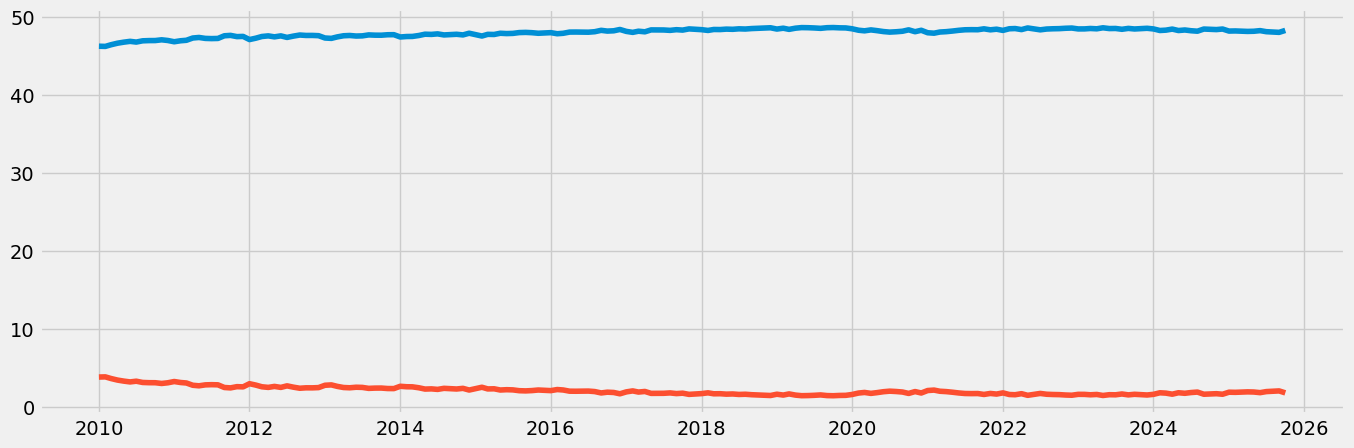

In [23]:
# Plot the prepared data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Employment2)

In [24]:
# spliting the dataframe to make it ready for the decomposition
# DataFrame with employed_percent
employed = Employment2[['employed_percent']]

# DataFrame with unemployed_percent
unemployed = Employment2[['unemployed_percent']]


In [25]:
employed.head()

,employed_percent
date,
2010-01-01,46.205860
2010-02-01,46.183684
2010-03-01,46.398199
2010-04-01,46.594040
2010-05-01,46.725220


In [ ]:
unemployed.head()

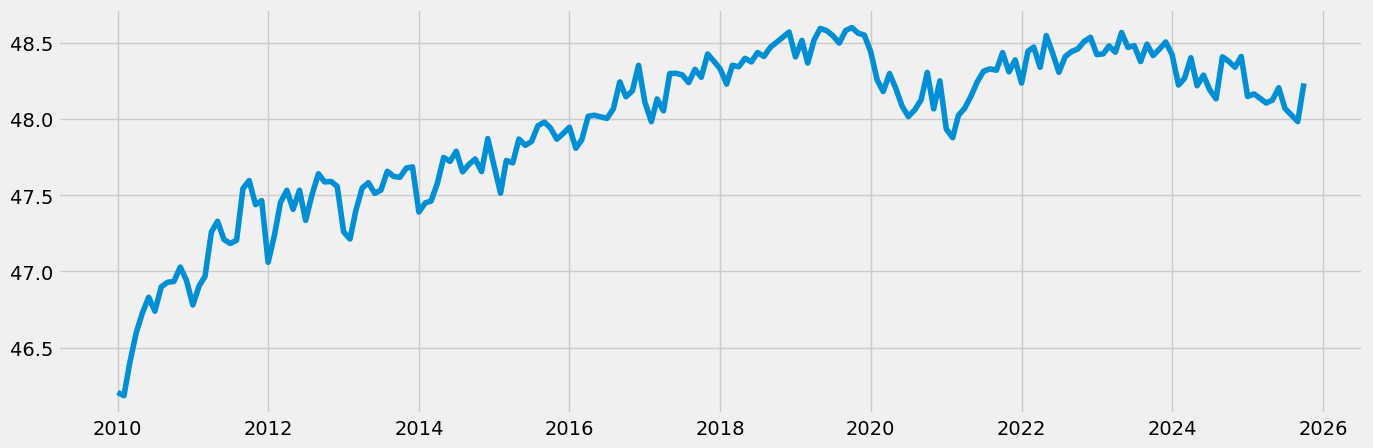

In [74]:
# Plot the prepared data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(employed)
# Save file
plt.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Employment_org.png')

## 3. Time-series analysis: decomposition for the employment

In [33]:
# Decompose the time series using an additive model

decomposition_em = sm.tsa.seasonal_decompose(employed, model='additive', period=12)

In [34]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

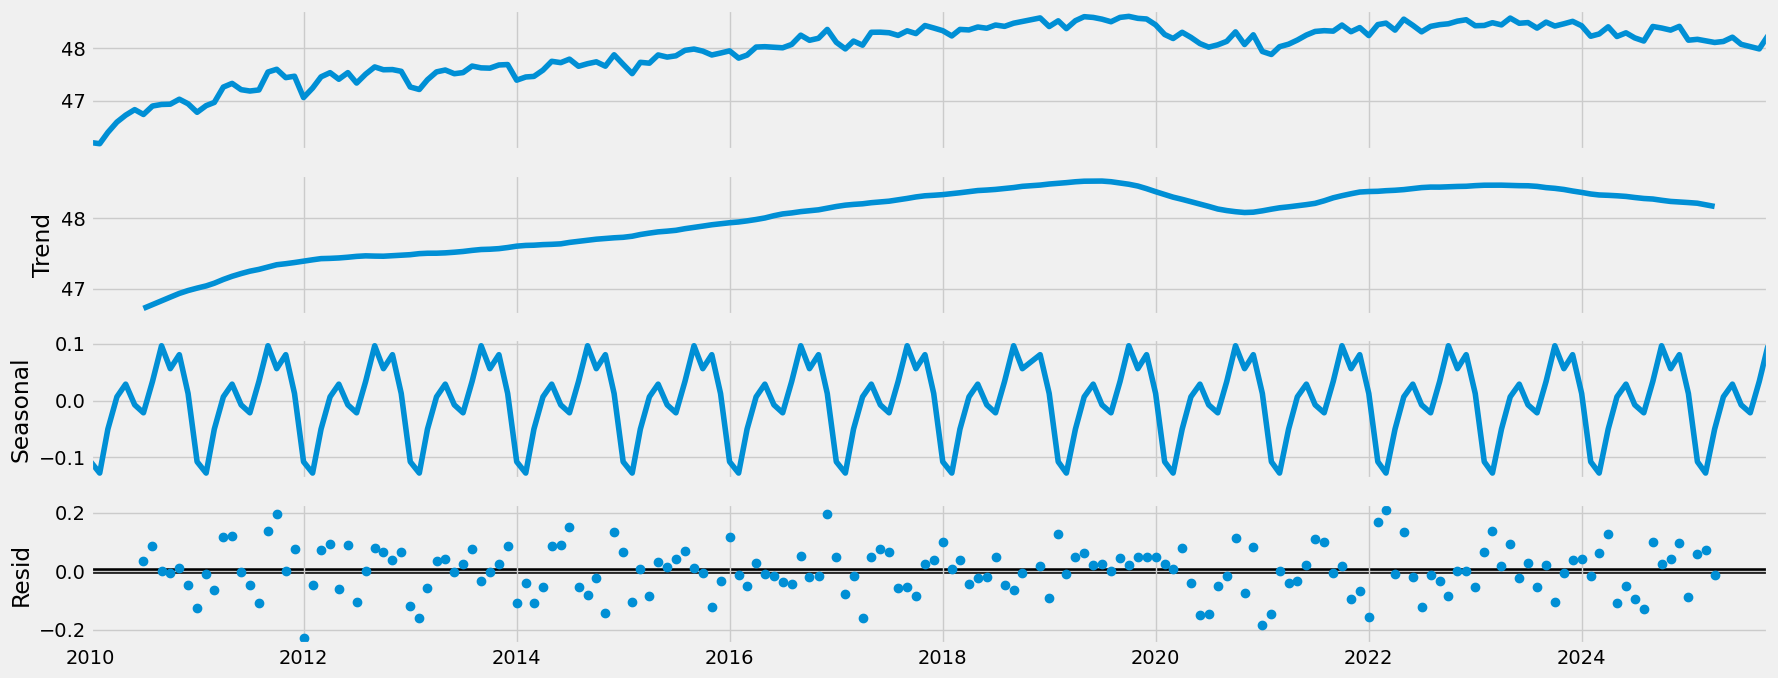

In [64]:
# Plot the separate components

decomposition_em.plot()
# Save file
plt.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Employment_decomp_org.png')
plt.show()

In [51]:
# Extract components
trend1 = decomposition_em.trend
seasonal1 = decomposition_em.seasonal
resid1 = decomposition_em.resid

In [53]:
# Save each component to CSV
decomposition_em.trend.to_csv("trend1.csv", index=True)
decomposition_em.seasonal.to_csv("seasonal1.csv", index=True)
decomposition_em.resid.to_csv("residual1.csv", index=True)


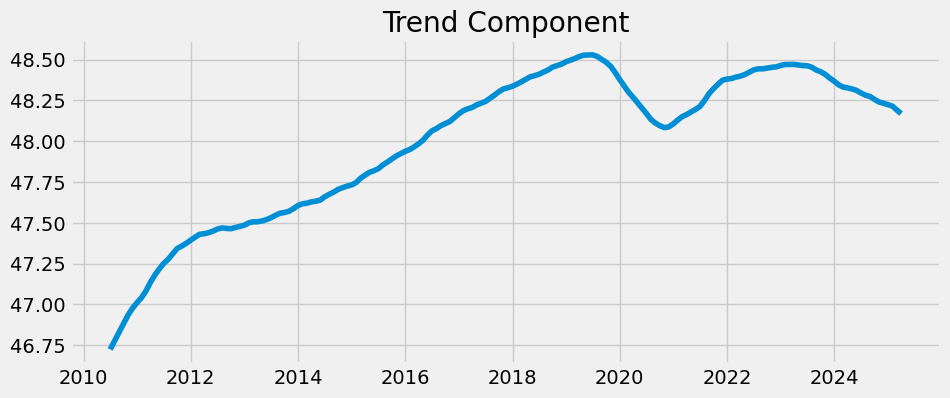

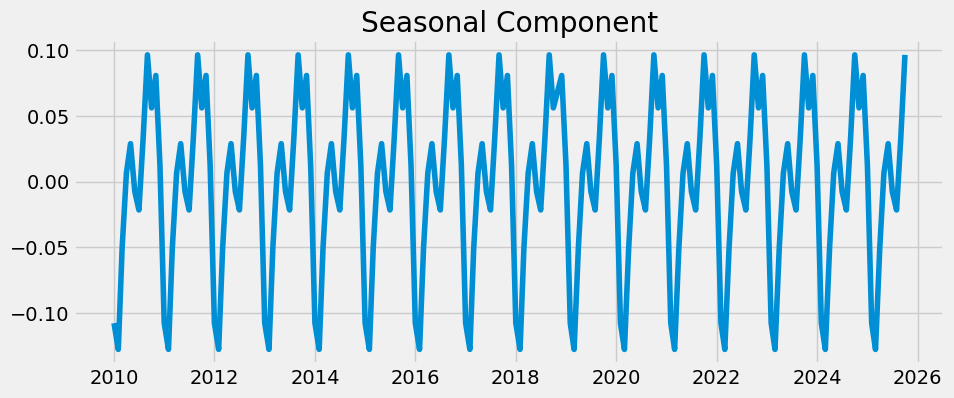

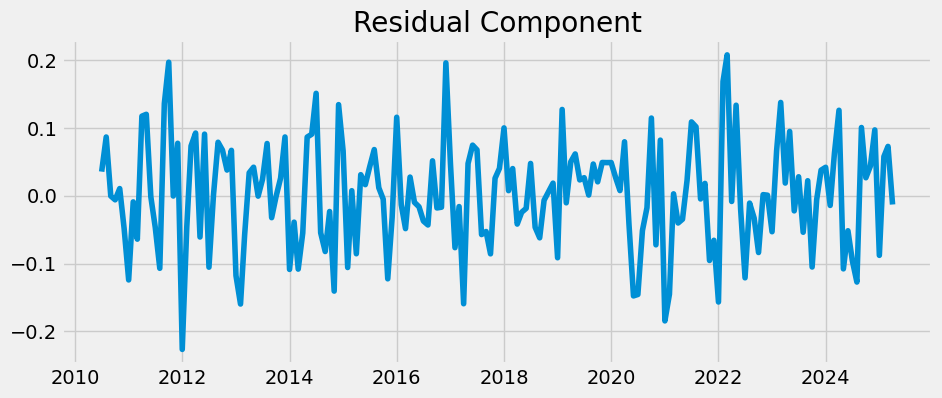

In [48]:
# Plot each one separately
plt.figure(figsize=(10,4))
plt.plot(trend)
plt.title("Trend Component")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(seasonal)
plt.title("Seasonal Component")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(resid)
plt.title("Residual Component")
plt.show()


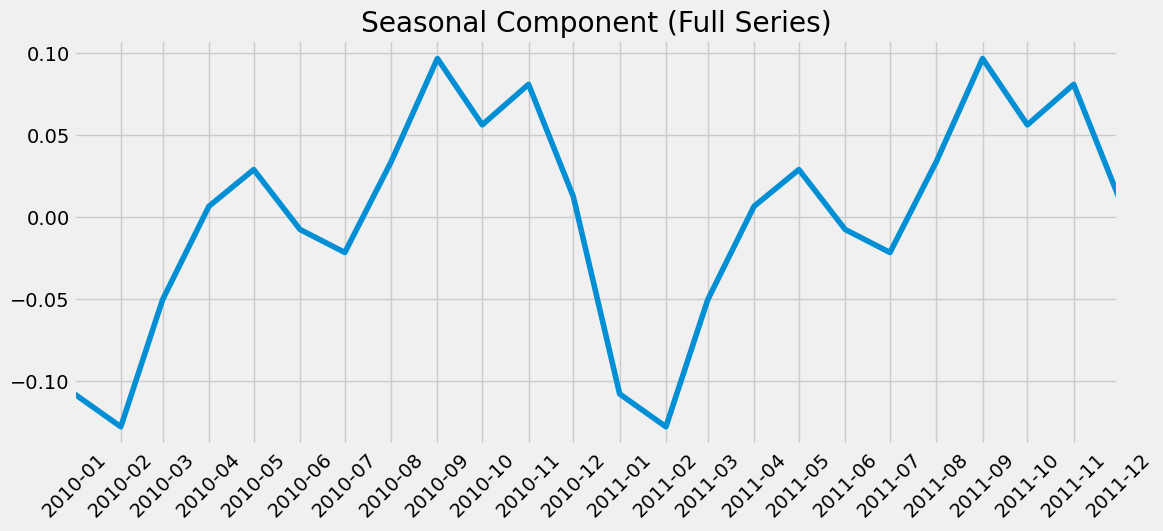

In [65]:
# seasonal plot with detailed monthly changes
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))
plt.plot(decomposition_em.seasonal)
plt.title("Seasonal Component (Full Series)")

# Set x-axis ticks to every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())   # tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format as Year-Month

# rotate labels for readability
plt.xticks(rotation=45)
# limit the x axis to 2 years to show the monthly changes
plt.xlim(pd.to_datetime("2010-01"), pd.to_datetime("2011-12"))
# Save file
plt.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Employment_decomp_seasonal.png')
plt.show()
plt.show()


## 4. Testing for stationarity

In [73]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(employed['employed_percent'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.220049
p-value                          0.199049
Number of Lags Used             13.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64


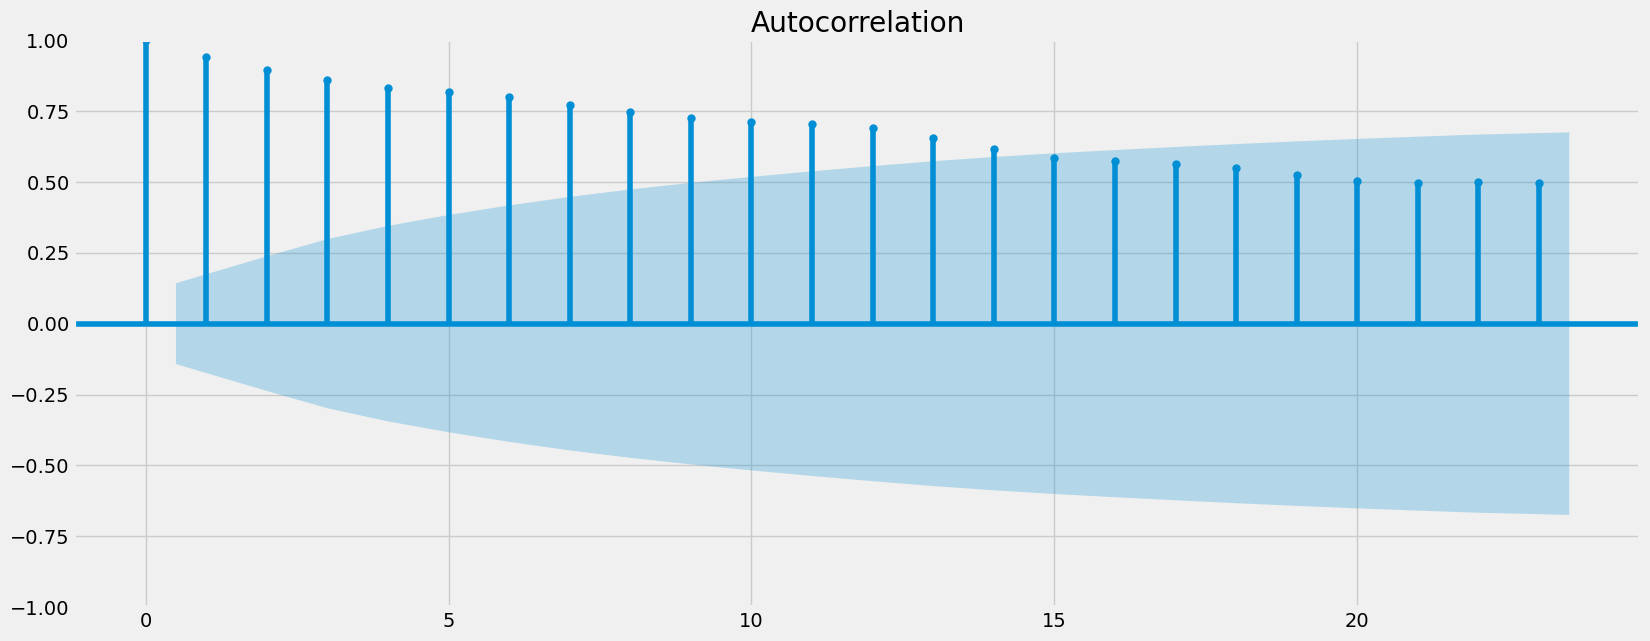

In [75]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(employed)
plt.show()

##### The Augmented Dickey–Fuller test
was applied to the series. A test statistic of –2.22 was obtained. A p‑value of 0.199 was reported, which exceeded the conventional 0.05 threshold. Critical values at the 1%, 5%, and 10% levels were provided as –3.47, –2.88, and –2.58 respectively. Since the test statistic was not more negative than any of these critical values, the null hypothesis of non‑stationarity was not rejected.
##### autocorrelation plot 
plotting the autocorrelation  is showing majoity of point are out of the confidence interval. i.e not stationary data.
##### Conclusion
As a result, the series was considered non‑stationary, indicating that underlying trends or seasonal components were present and would need to be removed before further modeling or decomposition could be performed.

## 5. Stationarizing the Employment Data

In [66]:
# decoposition using the 1-lag difference method making the whole thing t - (t -1)
employed_diff = employed - employed.shift(1) 

In [78]:
employed_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [79]:
employed_diff.head()

,employed_percent
date,
2010-02-01,-0.022177
2010-03-01,0.214515
2010-04-01,0.195840
2010-05-01,0.131180
2010-06-01,0.105149


In [80]:
employed_diff.columns

Index(['employed_percent'], dtype='object')

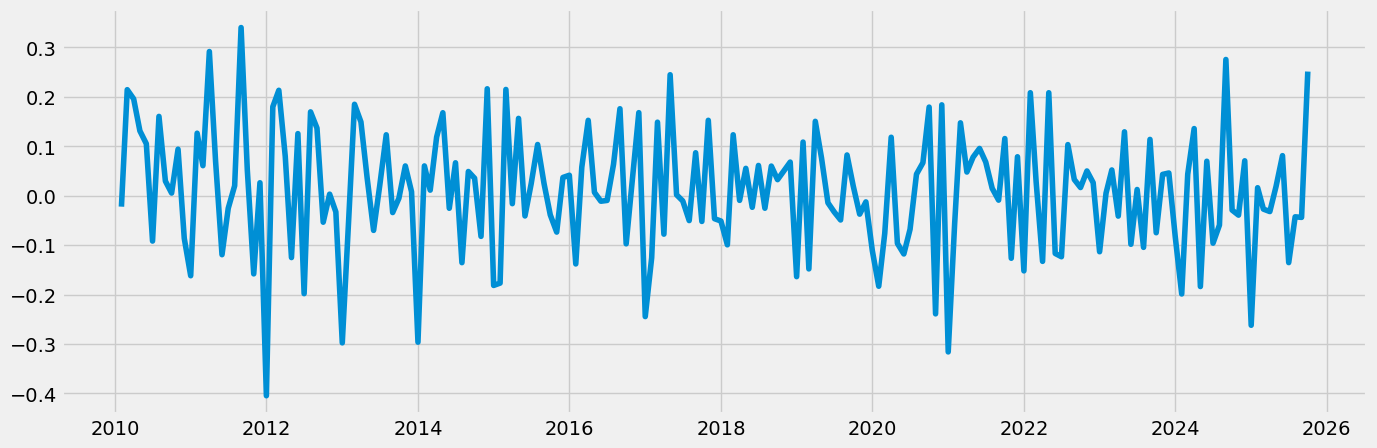

In [82]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(employed_diff)

In [85]:
dickey_fuller(employed_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.498402
p-value                          0.115864
Number of Lags Used             13.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64


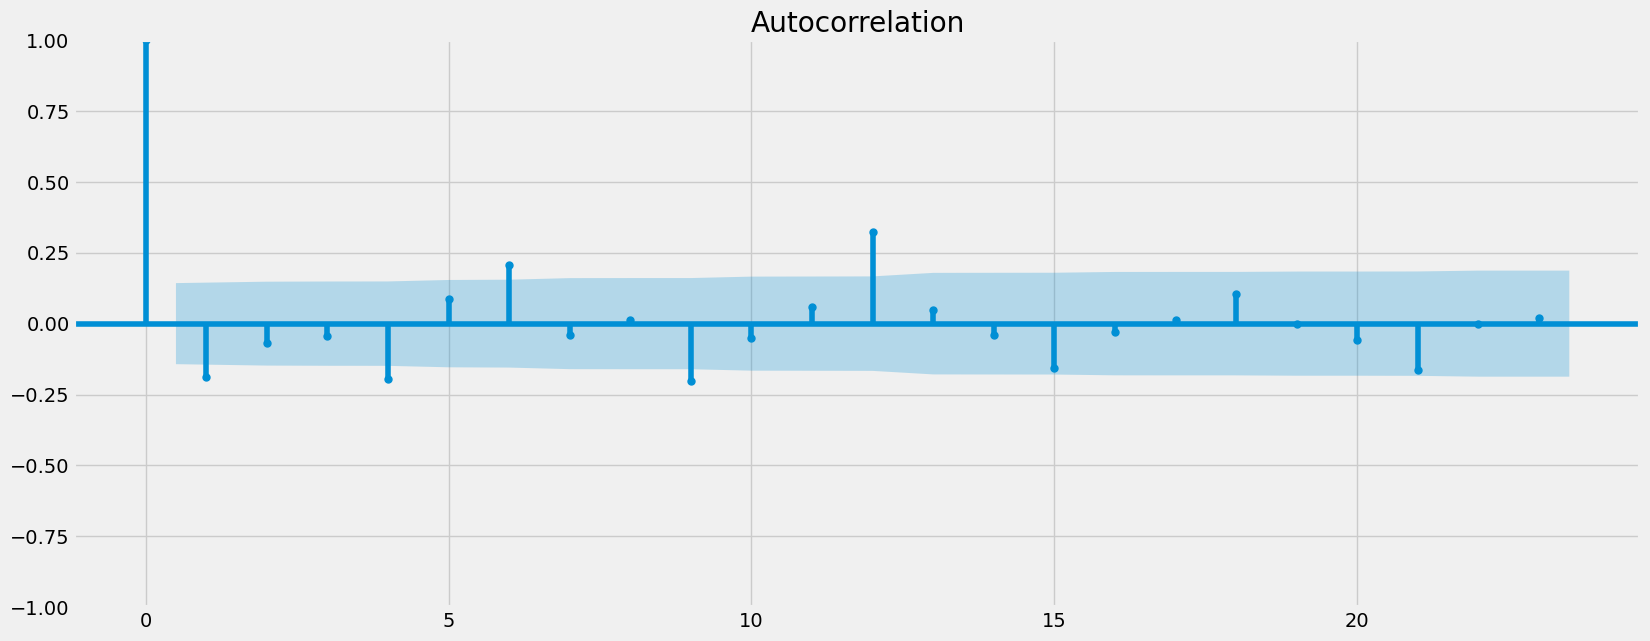

In [86]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(employed_diff)
plt.show()

After first differencing, the ADF test statistic was –2.50.

The p‑value was 0.116, still above 0.05.

The null hypothesis of non‑stationarity was not rejected.

The autocorrelation plot showed that almost all lags fell within the confidence interval, except for one — meaning most serial correlation was removed, but not completely.

## 5.1 second time defferencing

In [87]:
employed_diff2 = employed_diff.diff().dropna()

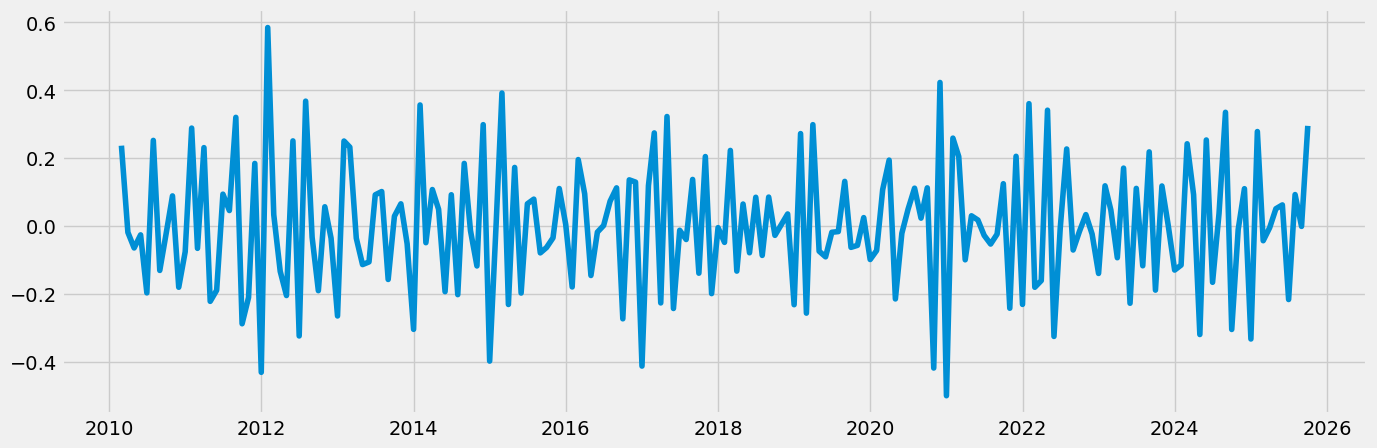

In [92]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(employed_diff2)

In [93]:
dickey_fuller(employed_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -9.165690e+00
p-value                        2.464340e-15
Number of Lags Used            1.200000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64


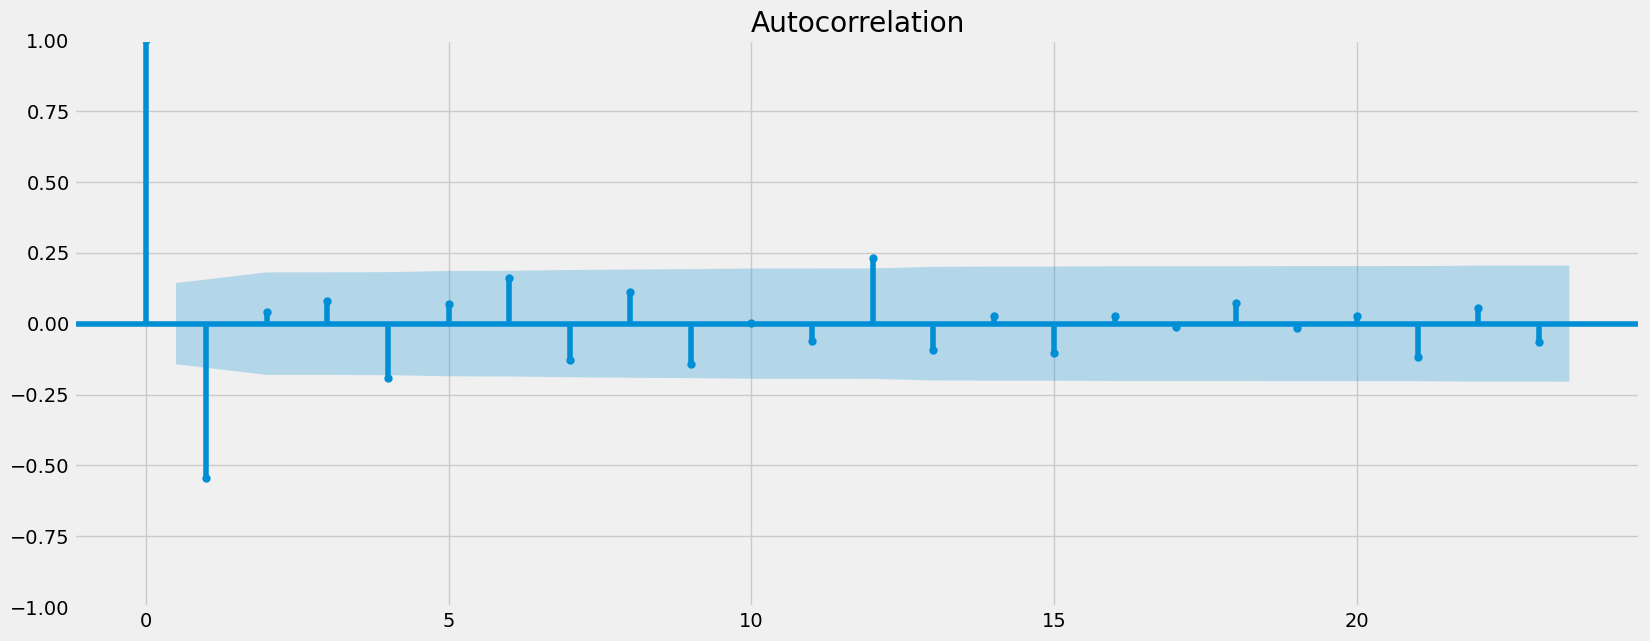

In [98]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(employed_diff2)
plt.show()

The Augmented Dickey–Fuller test was applied to the twice‑differenced employment series. A test statistic of **–9.17** was obtained. The p‑value was reported as **2.46 × 10⁻¹⁵**, which is far below the conventional 0.05 threshold. Critical values were provided as –3.47 at the 1% level, –2.88 at the 5% level, and –2.58 at the 10% level. Since the test statistic was substantially more negative than all of these critical values, the null hypothesis of non‑stationarity was rejected.  

althouth the series is considered **stationary**, the p-value is very low and the autocorrelation plot showing no improvement. This might indicate over differenced.

  

### decomposition after differencing

In [96]:
# Decompose the time series using an additive model

decomposition_diff = sm.tsa.seasonal_decompose(employed_diff2, model='additive', period=12)

In [ ]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

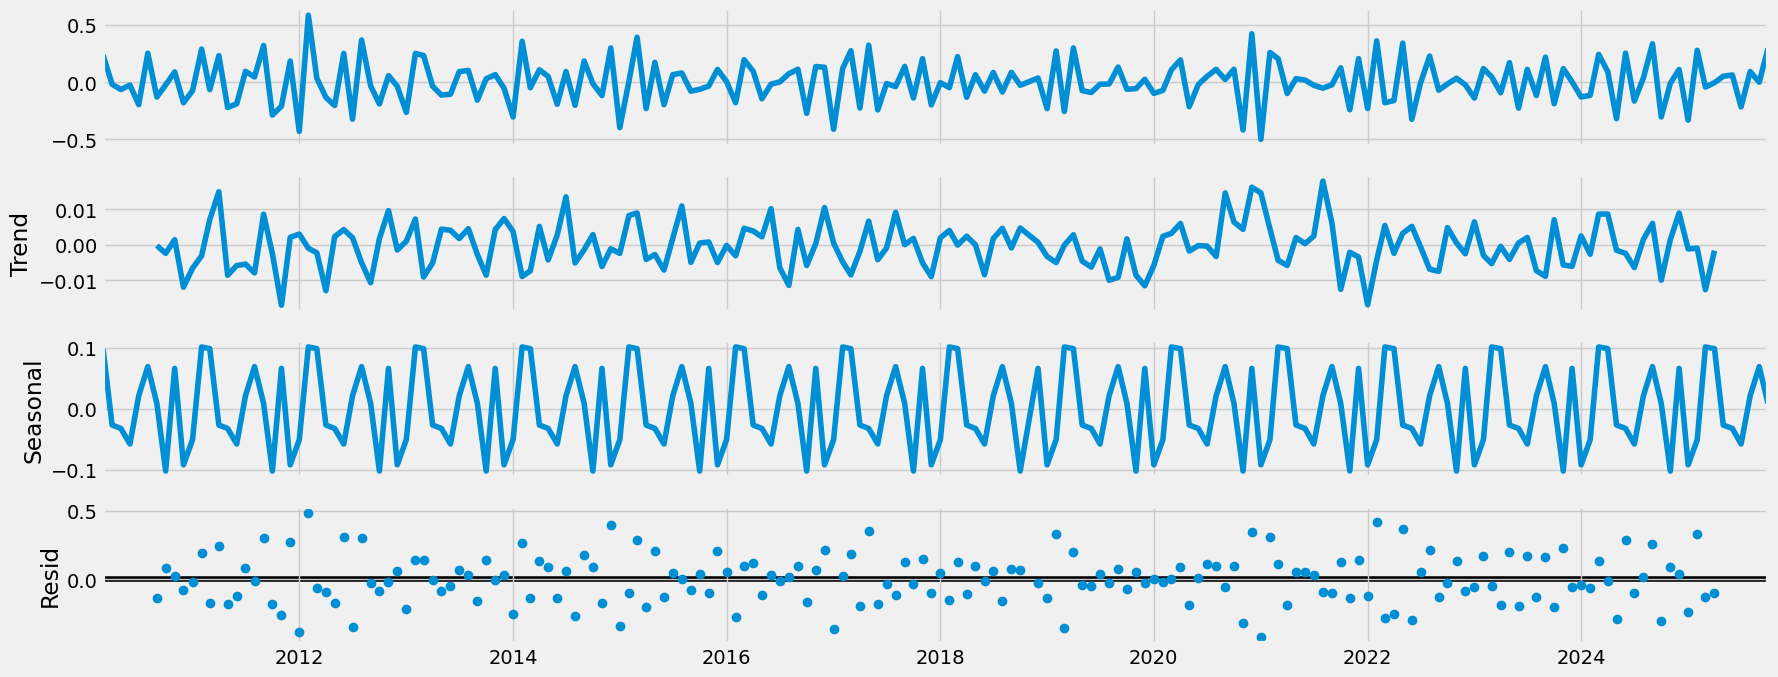

In [97]:
# Plot the separate components

decomposition_diff.plot()
plt.show()

## 6. alternative differencing: seasonal (12 month) differencing

In [69]:
#here i am trying 12-lag seasonal differencing to avoid over differencing 
employed_seasonal_diff = employed.diff(12).dropna()


In [70]:
employed_seasonal_diff 

,employed_percent
date,
2011-01-01,0.573970
2011-02-01,0.722629
2011-03-01,0.568850
2011-04-01,0.664705
2011-05-01,0.603309
...,...
2025-06-01,-0.083092
2025-07-01,-0.122424
2025-08-01,-0.105758


In [75]:
employed_seasonal_diff.to_csv(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\seasonal_decomp_employed.csv',index=True)

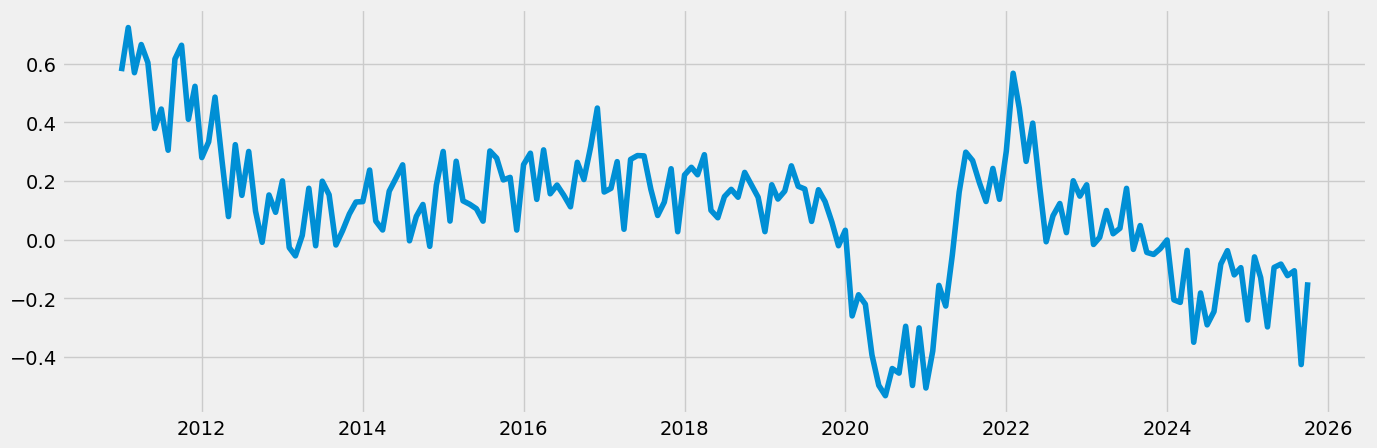

In [73]:
# Check out what the seasonal differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(employed_seasonal_diff )
# Save file
plt.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\Employment_seasonal_decomp.png')


In [103]:
dickey_fuller(employed_seasonal_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.934900
p-value                          0.041437
Number of Lags Used             13.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64


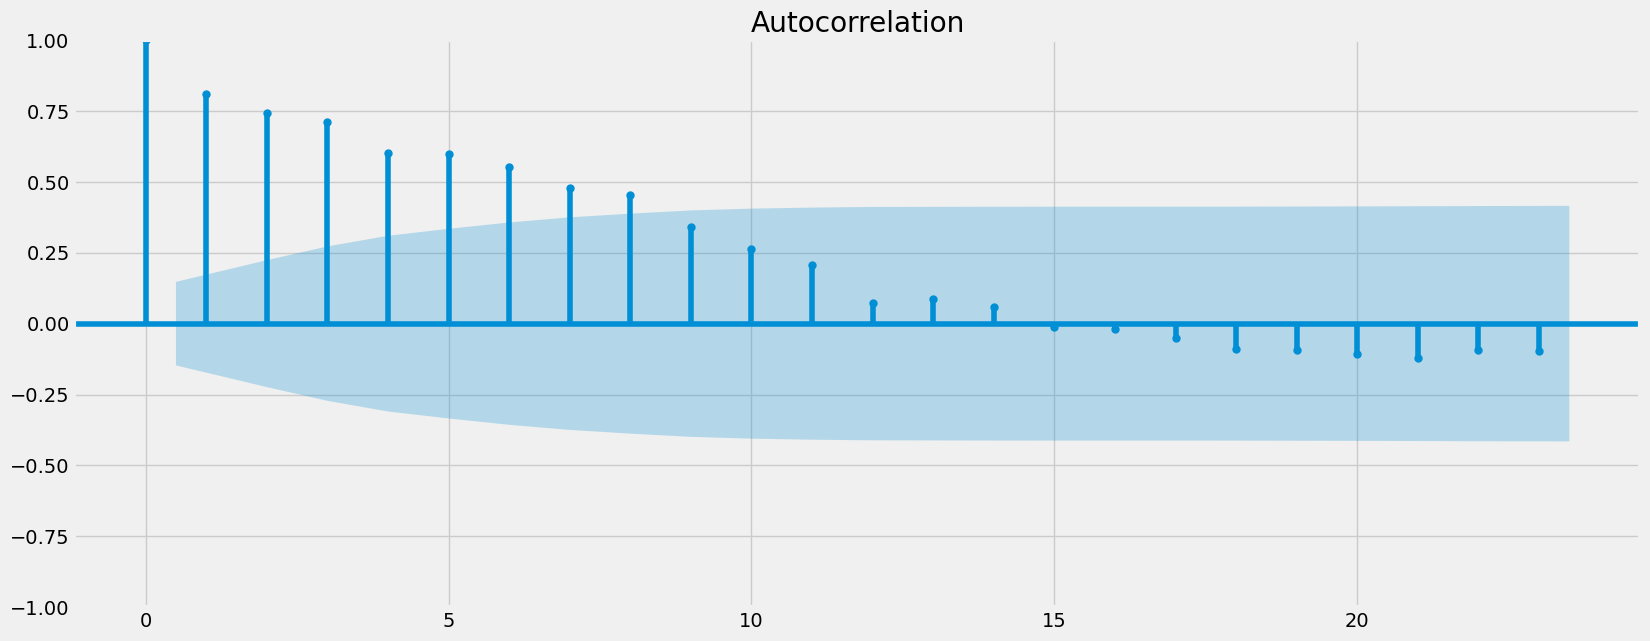

In [104]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(employed_seasonal_diff)
plt.show()

The Augmented Dickey–Fuller test was performed on the seasonally differenced series. A test statistic of –2.93 was obtained. The p‑value was reported as 0.041, which fell below the conventional 0.05 threshold. Critical values were provided as –3.47 at the 1% level, –2.88 at the 5% level, and –2.58 at the 10% level. Since the test statistic was more negative than the 5% and 10% critical values, but not the 1% level, the null hypothesis of non‑stationarity was rejected at the 5% significance level.

Stationarity confirmed by ADF: The Dickey–Fuller test gave a p‑value of 0.041, so the null hypothesis of non‑stationarity was rejected. Statistically, the series is stationary.

ACF showing many spikes outside the confidence interval: This indicates that although the unit root was removed, there is still strong autocorrelation structure in the data. In other words, the series is stationary but not “white noise.”

## 6.1 Decomposition after seasonal differencing

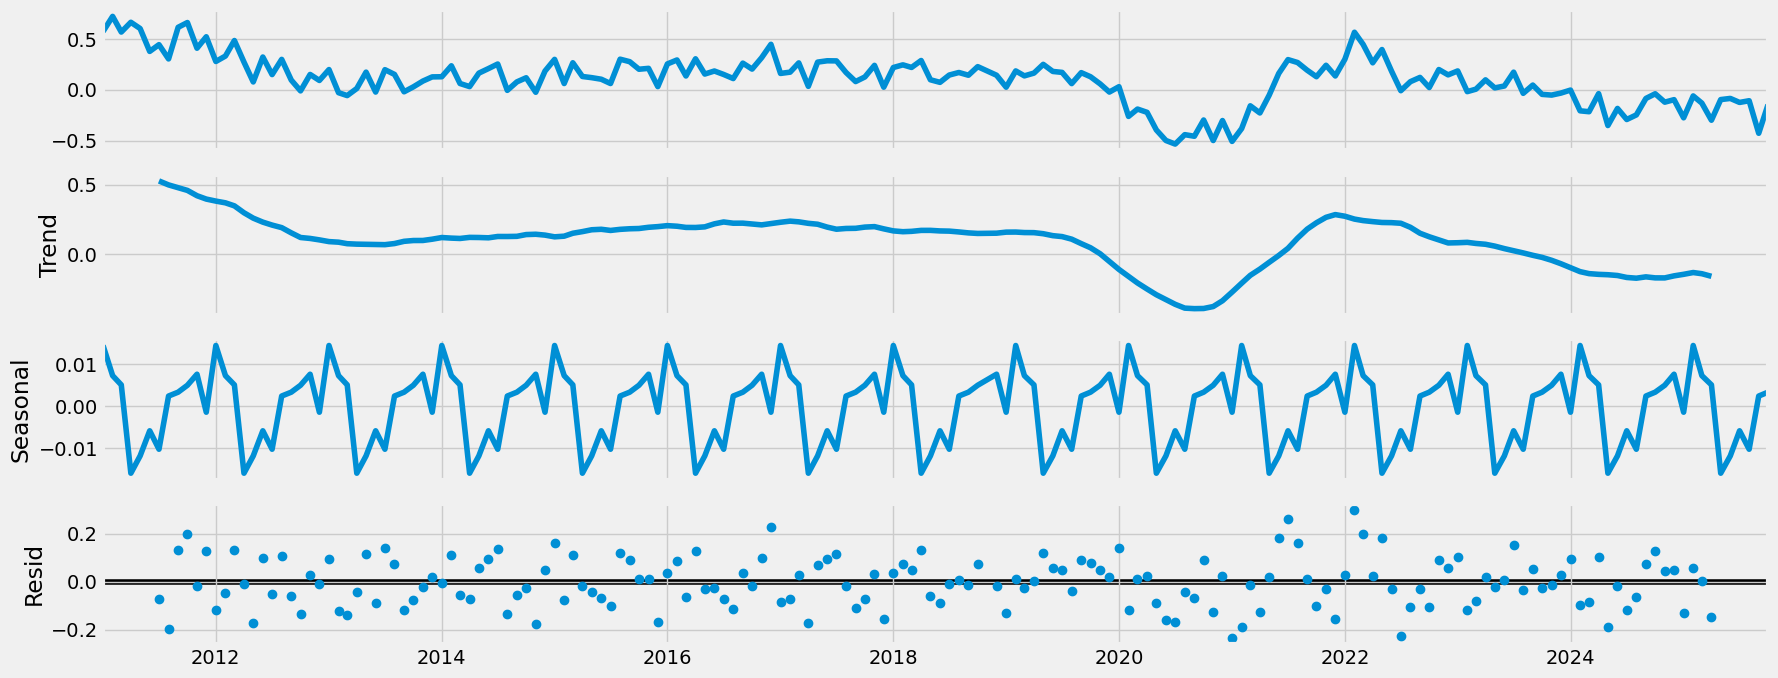

In [77]:
# Decompose the time series using an additive model

sea_decomposition = sm.tsa.seasonal_decompose(employed_seasonal_diff, model='additive', period=12)
rcParams['figure.figsize'] = 18, 7

# Plot the separate components
sea_decomposition.plot()
plt.show()

In [78]:
# Extract components
trend2 = sea_decomposition.trend
seasonal2 = sea_decomposition.seasonal
resid2 = sea_decomposition.resid

In [79]:
# Save each component to CSV
sea_decomposition.trend.to_csv("trend2.csv", index=True)
sea_decomposition.seasonal.to_csv("seasonal2.csv", index=True)
sea_decomposition.resid.to_csv("residual2.csv", index=True)


In [80]:
# merging the decomposition components in one dataframe to use it later in tableau
# Assuming trend2, seasonal2, resid2 dataframes has the same time-index

# Concatenate along the columns (axis=1)
sea_deco_comp = pd.concat([trend2, seasonal2, resid2], axis=1)


In [81]:
sea_deco_comp

,trend,seasonal,resid
date,,,
2011-01-01,NaN,0.014439,NaN
2011-02-01,NaN,0.007277,NaN
2011-03-01,NaN,0.005081,NaN
2011-04-01,NaN,-0.015913,NaN
2011-05-01,NaN,-0.011794,NaN
...,...,...,...
2025-06-01,NaN,-0.011794,NaN
2025-07-01,NaN,-0.005831,NaN
2025-08-01,NaN,-0.010217,NaN


In [82]:
sea_deco_comp.to_csv(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\seasonal_decomp_comp.csv',index=True)